In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf

raw_airlines=pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Forecasting\\Airlines+Data.csv",header=0)
raw_airlines['Period']=0
raw_airlines

,Month,Passengers,Period
0,Jan-95,112,0
1,Feb-95,118,0
2,Mar-95,132,0
3,Apr-95,129,0
4,May-95,121,0
...,...,...,...
91,Aug-02,405,0
92,Sep-02,355,0
93,Oct-02,306,0
94,Nov-02,271,0


In [215]:
for i in range(0,raw_airlines.shape[0]):
    kp = raw_airlines["Month"].loc[i]
    raw_airlines.loc[i,"Period"]= kp[0:3]

dummies = pd.get_dummies(raw_airlines["Period"])
Airlines = pd.concat([raw_airlines,dummies],axis = 1)
Airlines

,Month,Passengers,Period,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [216]:
Airlines["t"] = np.arange(1,Airlines.shape[0]+1)
Airlines["t_squared"] = (Airlines["t"])*(Airlines["t"])
Airlines["Log_Passengers"] = np.log(Airlines["Passengers"])
Airlines

,Month,Passengers,Period,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


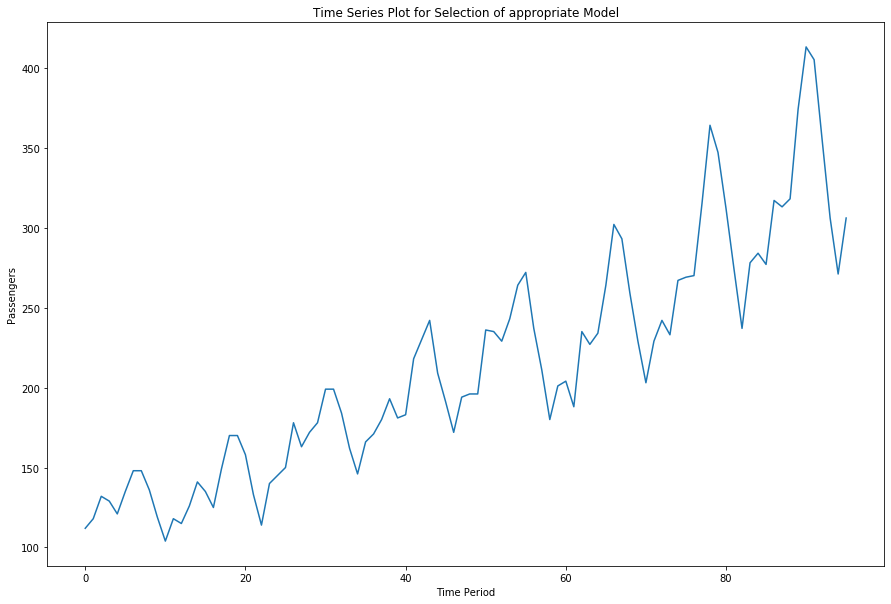

In [217]:
#Plot to determine the pattern of the time Series data in order to Select the suitable model which would best fit for the 
#Given time series data

plt.figure(figsize=(15,10))
Airlines.Passengers.plot()
plt.title('Time Series Plot for Selection of appropriate Model')
plt.ylabel('Passengers')
plt.xlabel('Time Period')
plt.show()

#It is evident from the graph that the Time Series data has got Level,Trend and Multiplicative seasonality

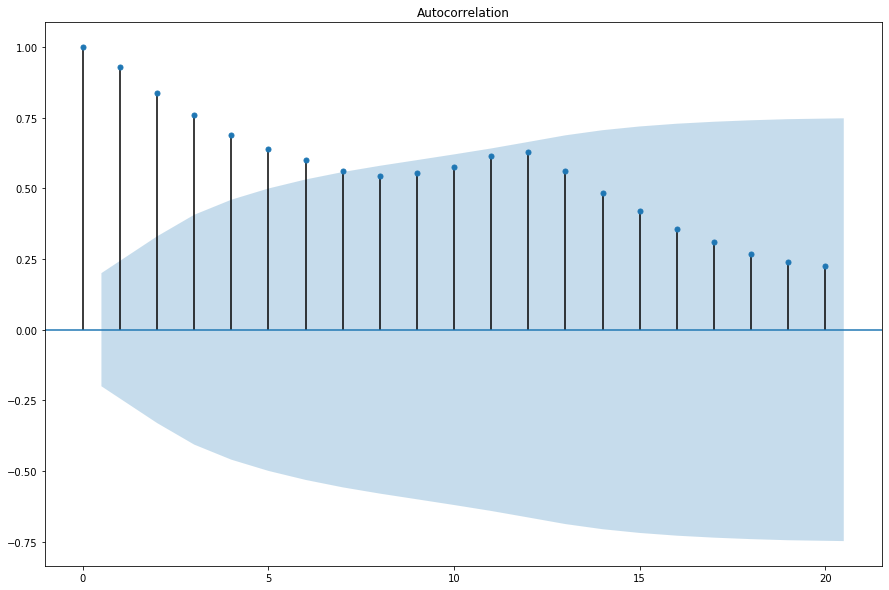

In [218]:
#Split the data to Train and Test Set
train = Airlines.head(87)
test = Airlines.tail(9)
model=[];rmse=[];mape=[]

#AutoCorrelation Function(ACF)/Correlogram which gives the Corr() between the Original variable and its Lagged Version
fig, ax = plt.subplots(figsize=(15,10))
plot_acf(Airlines.Passengers,ax=ax)
plt.show()

In [219]:
#LINEAR Model

Linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  Linear_model.predict(test['t'])
rmse_linear = np.sqrt(np.mean((test['Passengers']-pred_linear)**2))
mape_linear = np.mean(np.abs((test['Passengers']-pred_linear) / test['Passengers'])) * 100
model.append("LINEAR");rmse.append(rmse_linear);mape.append(mape_linear)
mape_linear

12.794452645542552

In [220]:
#EXPONENTIAL Model

Exponential_model = smf.ols('Log_Passengers~t',data=train).fit()
pred_exponential =  Exponential_model.predict(test['t'])
rmse_exponential = np.sqrt(np.mean((test['Log_Passengers']-pred_exponential)**2))
mape_exponential = np.mean(np.abs((test['Log_Passengers']-pred_exponential) / test['Log_Passengers'])) * 100
model.append("EXPONENTIAL");rmse.append(rmse_exponential);mape.append(mape_exponential)
mape_exponential

2.1428753585401847

In [221]:
#QUADRATIC Model

Quadratic_model = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quadratic =  Quadratic_model.predict(test[["t","t_squared"]])
rmse_quadratic = np.sqrt(np.mean((test['Passengers']-pred_quadratic)**2))
mape_quadratic = np.mean(np.abs((test['Passengers']-pred_quadratic) / test['Passengers'])) * 100
model.append("QUADRATIC");rmse.append(rmse_quadratic);mape.append(mape_quadratic)
mape_quadratic

12.428255246035052

In [222]:
#ADDITIVE SEASONALITY Model

Additive_Seasonality_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_additive_seasonality = Additive_Seasonality_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_additive_seasonality = np.sqrt(np.mean((test['Passengers']-pred_additive_seasonality)**2))
mape_additive_seasonality = np.mean(np.abs((test['Passengers']-pred_additive_seasonality) / test['Passengers'])) * 100
model.append("ADDITIVE SEASONALITY");rmse.append(rmse_additive_seasonality);mape.append(mape_additive_seasonality)
mape_additive_seasonality

40.00608518812048

In [223]:
#MULTIPLICATIVE SEASONALITY Model

Multiplicative_Seasonality_model = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_multiplicative_seasonality = Multiplicative_Seasonality_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_multiplicative_seasonality = np.sqrt(np.mean((test['Log_Passengers']-pred_multiplicative_seasonality)**2))
mape_multiplicative_seasonality = np.mean(np.abs((test['Log_Passengers']-pred_multiplicative_seasonality) / test['Log_Passengers'])) * 100
model.append("MULTIPLICATIVE SEASONALITY");rmse.append(rmse_multiplicative_seasonality);mape.append(mape_multiplicative_seasonality)
mape_multiplicative_seasonality

9.437214746072843

In [224]:
# QUADRATIC MULTIPLICATIVE SEASONALITY Model

Quad_multi_sea_model = smf.ols('Log_Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_quad_multi_sea_model = Quad_multi_sea_model.predict(test[["t","t_squared",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_quad_multi_sea_model = np.sqrt(np.mean((test['Log_Passengers']-pred_quad_multi_sea_model)**2))
mape_quad_multi_sea_model = np.mean(np.abs((test['Log_Passengers']-pred_quad_multi_sea_model) / test['Log_Passengers'])) * 100
model.append("QUADRATIC MULTIPLICATIVE SEASONALITY");rmse.append(rmse_quad_multi_sea_model);mape.append(mape_quad_multi_sea_model)
mape_quad_multi_sea_model

0.8147274083978596

In [225]:
#EXPONENTIAL MULTIPLICATIVE SEASONALITY Model

Exp_multi_sea_model = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_exp_multi_sea_model = Exp_multi_sea_model.predict(test[["t",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_exp_multi_sea_model = np.sqrt(np.mean((test['Log_Passengers']-pred_exp_multi_sea_model)**2))
mape_exp_multi_sea_model = np.mean(np.abs((test['Log_Passengers']-pred_exp_multi_sea_model) / test['Log_Passengers'])) * 100
model.append("EXPONENTIAL MULTIPLICATIVE SEASONALITY");rmse.append(rmse_exp_multi_sea_model);mape.append(mape_exp_multi_sea_model)
mape_exp_multi_sea_model

0.40534560192712177

In [226]:
#Different Models Performance Table on Test Dataset

Performance_table = pd.DataFrame({"MODEL":pd.Series(model),"RMSE_Values":pd.Series(rmse),"MAPE_Values(%)":pd.Series(mape)})
print(Performance_table)

#It is evident from the Performance Table that EXPONENTIAL MULTIPLICATIVE SEASONALITY Model is the Best Fit which yields
#less error Compared to other Models prepared

                                    MODEL  RMSE_Values  MAPE_Values(%)
0                                  LINEAR    60.513332       12.794453
1                             EXPONENTIAL     0.151867        2.142875
2                               QUADRATIC    55.518429       12.428255
3                    ADDITIVE SEASONALITY   138.571281       40.006085
4              MULTIPLICATIVE SEASONALITY     0.550155        9.437215
5    QUADRATIC MULTIPLICATIVE SEASONALITY     0.054220        0.814727
6  EXPONENTIAL MULTIPLICATIVE SEASONALITY     0.030784        0.405346


In [227]:
#Training the model on the Entire Dataset by Choosing the Best Fit Model - EXPONENTIAL MULTIPLICATIVE SEASONALITY Model

best_model = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines).fit()
pred_best_model = best_model.predict(Airlines[["t",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
rmse_best_model = np.sqrt(np.mean((Airlines['Log_Passengers']-pred_best_model)**2))
mape_best_model = np.mean(np.abs((Airlines['Log_Passengers']-pred_best_model) / Airlines['Log_Passengers'])) * 100

print("RMSE Value for the Best Fit-EXPONENTIAL MULTIPLICATIVE SEASONALITY Model: ",rmse_best_model)
print("MAPE Value for the Best Fit-EXPONENTIAL MULTIPLICATIVE SEASONALITY Model(%): ",mape_best_model)

RMSE Value for the Best Fit-EXPONENTIAL MULTIPLICATIVE SEASONALITY Model:  0.043676569509064324
MAPE Value for the Best Fit-EXPONENTIAL MULTIPLICATIVE SEASONALITY Model(%):  0.6567301359953202
